In [93]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import re

rcParams["figure.dpi"] = 300
rcParams["text.usetex"] = True

# This reads fieldMinMax.dat function object output - do not overwrite

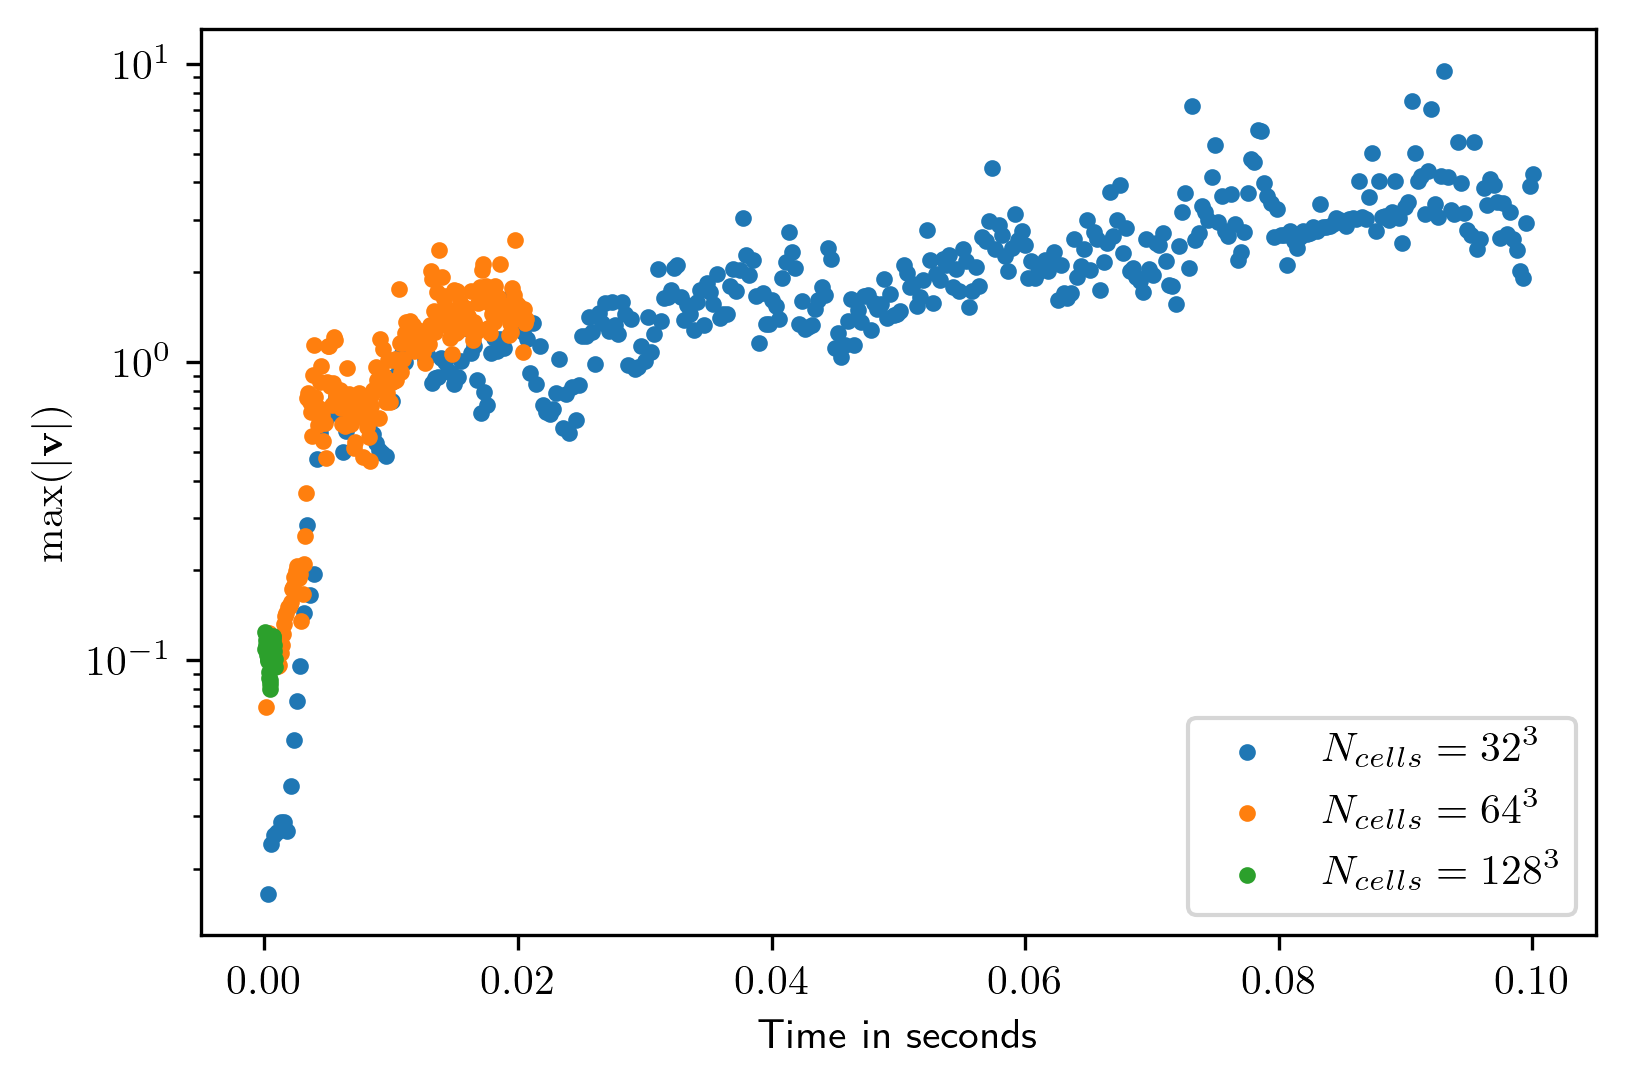

In [94]:
study_pattern = "divNormal_000"
file_path = "postProcessing/minMaxU/0/fieldMinMax.dat"

study_folders = [folder for folder in os.listdir(os.curdir) 
                 if os.path.isdir(folder) and                  
                 study_pattern in folder]

data_files = [os.path.join(study_folder, file_path) 
              for study_folder in study_folders]

for study_folder in study_folders:
    data_file = os.path.join(study_folder, file_path)
    data = pd.read_table(data_file, header=1, sep='\t')
    data.columns = [column.replace(" ","") 
                    for column in data.columns]
    param_file_path = os.path.join(study_folder, "PyFoamPrepareCaseParameters")
    param_file = open(param_file_path, "r")
    param_lines = param_file.readlines()
    param_lines = [line for line in param_lines if ";" in line]
    param_dict = {}
    for line in param_lines:
        key_value = line.rstrip("\n").rstrip(";").split(" ")
        if (key_value[-1] != '' and key_value[-1] != 'none'):
            param_dict[key_value[0]] = key_value[1]
        
    plt.plot(data["#Time"], data['max(U)'], '.', 
             label="$N_{cells}=%s^3$" % param_dict["RESOLUTION"])
    
plt.semilogy()
plt.legend()
plt.ylabel("$\max(|\mathbf{v}|)$")
plt.xlabel("Time in seconds")
plt.savefig(study_pattern.split('_')[0] + ".pdf", bbox_inches='tight')
plt.savefig(study_pattern.split('_')[0] + ".png", bbox_inches='tight')